<span style="font-size:24pt; color:blue; font-family: 'Times New Roman'">Notebook 
    <span style="color:green;"> for exploring and plotting <b>RAW ISMIP6 *nc data</b>.</span>
</span>
<br>  
<span style="font-size:14pt; color:black; font-family:Georgia, serif;font-style:italic">by Praveen Kumar and Sophie Nowicki.</span>  

<br>
<br>
<span style="font-family:'Courier New', monospace; font-size:14pt; color:black"> <b>Background::</b> <br>
    This is a notebook that is being created to explore the results from the Experimental protocol for sea level projections from ISMIP6 stand-alone ice sheet models <a href="https://tc.copernicus.org/articles/14/2331/2020/" style="color:blue; text-decoration:underline;">Nowicki_et_al2020</a>. <br>
    For an overview: Experimental protocol for Antarctic projections refer to the <a href="https://theghub.org/groups/ismip6/wiki/ISMIP6-Projections-Antarctica " style="color:blue; text-decoration:underline;">ISMIP6 Wiki</a>
    <br>
    The data is housed in the University at Buffalo and can be accessed using <b>Ghub</b> (<a href="https://theghub.org/dataset-listing" style="color:blue; text-decoration:underline;">GHUB data-listing</a>). For this notebook, we will be using ISMIP6 21st Century Antarctic Projections which can be accessed (<a href="https://theghub.org/resources/4748/about" style="color:blue; text-decoration:underline;">Ghub AIS ISMIP6 data</a>). 
    <br>
    Please note that data access and downloading is non-trivial. You will need to request data access and have ~2TB of storage space. Details for accessing the data can be found at <a href="https://theghub.org/accessing-data-with-globus#endpoints" style="color:blue; text-decoration:underline;">How to Access Ghub's Globus endpoints</a>. 
</span>
<br>
<br>

<ol style="background-color: yellow;font-size:18pt;"> <b>Updates to share with Sophie</b> <br>
    <li> Work to refine data access workflow. Is there some one who can point me how to access the data using SSH? </li>
    <li> Storage and UB account? </li>
    <li> DATA access should be another notebook. </li>
</ol>
<br>
<br>
<span style="font-size:14pt; font-family:'Courier New', monospace; color:black"> In this notebook we assume that the user has downloaded the full set of AIS ISMIP6 data<br>

<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> Xplore ::
    <span style="font-size:14pt; color:green;"> RAW *.nc data files </span>

</span>

In [1]:
import os
import fun as fn
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from IPython.display import display, HTML

import fun as fn

In [2]:
path = f'/Volumes/Geek_Boi-Ed/ISMIP6/'

<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> List the <b>modelling group</b> names:
</span>

In [3]:
files=fn.list_files_with_names(path, [""])
#
df = pd.DataFrame(files, columns=['Model Name']).reset_index().rename(columns={'index': 'Index'})

# print(df.to_string(index=False))
# Convert the DataFrame to HTML, hide the index
html = df.to_html(index=False)
display(HTML(html))

Index,Model Name
0,.DS_Store
1,AWI
2,CPOM
3,DOE
4,ILTS_PIK
5,IMAU
6,JPL1
7,LSCE
8,NCAR
9,PIK


<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> List details of the <b>ice flow model and experiments</b> names:
</span>

In [4]:
# # DoNOT use this, gives a cluttered view of level 6. For shorthand, I rewrote the fn and is used below. 
# df_folders = fn.list_folders_as_multilevel_df_grouped(path)
# html = df_folders.to_html()
# display(HTML(html))

In [5]:
df_folders = fn.list_folders_as_multilevel_df_grouped1(path,6)
html = df_folders.to_html()
display(HTML(html))

,Level_1,Level_2,Level_3,Level_4,Level_5,Level_6,Level_6_Subfolders
0,,Volumes,Geek_Boi-Ed,ISMIP6,[/],None,None
1,,Volumes,Geek_Boi-Ed,ISMIP6,AWI,[/],None
2,,Volumes,Geek_Boi-Ed,ISMIP6,AWI,PISM1,"[/, ctrl_proj_std, exp01, exp02, exp03, exp04, exp05, exp06, exp07, exp08, exp09, exp10, exp11, exp12, exp13, expA1, expA2, expA3, expA4, expA5, expA6, expA7, expA8, expB1, expB10, expB2, expB3, expB4, expB5, expB6, expB7, expB8, expB9, hist_std]"
3,,Volumes,Geek_Boi-Ed,ISMIP6,CPOM,[/],None
4,,Volumes,Geek_Boi-Ed,ISMIP6,CPOM,BISICLES,"[/, expT71_08, expT73_08, expTD58_08]"
5,,Volumes,Geek_Boi-Ed,ISMIP6,DOE,[/],None
6,,Volumes,Geek_Boi-Ed,ISMIP6,DOE,MALI,"[/, ctrl_proj_std, exp05, exp06, exp07, exp08, exp09, exp10, exp12, exp13]"
7,,Volumes,Geek_Boi-Ed,ISMIP6,ILTS_PIK,[/],None
8,,Volumes,Geek_Boi-Ed,ISMIP6,ILTS_PIK,SICOPOLIS1,"[/, ctrl_proj_std, exp05, exp06, exp07, exp08, exp09, exp10, exp12, exp13, expA5, expA6, expA7, expA8, expB10, expB6, expB7, expB8, expB9, expC1, expC10, expC12, expC3, expC4, expC6, expC7, expC9, expD1, expD10, expD11, expD12, expD13, expD14, expD15, expD16, expD17, expD18, expD19, expD2, expD20, expD3, expD4, expD5, expD51, expD52, expD53, expD54, expD55, expD56, expD57, expD58, expD6, expD7, expD8, expD9, expE10, expE6, expE7, expE8, expE9, hist_std]"
9,,Volumes,Geek_Boi-Ed,ISMIP6,IMAU,[/],None


<span style="font-size: 12pt; color: blue; font-family: 'Times New Roman';">
The table above needs to be refined. </span>  
<ol>
    <li>Make the table generating code to be dynamic based on the folder structure, or include a level for concat in the fun. THis can be engineered differently later</li>
</ol>


In [6]:
# # This is a more detailed view 
# path = f'../3940766/ComputedScalarsPaper/'  
# df_folders = fn.list_folders_as_multilevel_df_sorted(path)
# html = df_folders.to_html()
# display(HTML(html))

<span style="font-size: 22pt; color: blue; font-family: 'Times New Roman';">
List the variables/data </span>  

In [7]:
GroupID='UTAS'; IceFlowModel='ElmerIce'; experiment='ctrl_proj_std'
path2file=f'{path}/{GroupID}/{IceFlowModel}/{experiment}/'
var_parts1=fn.list_var_4m_nc(path2file,0)
var_parts1

['acabf',
 'base',
 'dlithkdt',
 'iareafl',
 'iareagr',
 'libmassbffl',
 'lim',
 'limnsw',
 'lithk',
 'orog',
 'sftflf',
 'sftgif',
 'sftgrf',
 'strbasemag',
 'tendacabf',
 'tendlibmassbf',
 'topg',
 'xvelbase',
 'xvelmean',
 'xvelsurf',
 'yvelbase',
 'yvelmean',
 'yvelsurf',
 'zvelbase',
 'zvelsurf']

<span style="font-size: 18pt; color: black; font-family: 'Times New Roman';">
Details of the output <code> data/variable</code> can be found in   in the 
<a href="https://tc.copernicus.org/articles/14/2331/2020/" 
<a href="https://theghub.org/groups/ismip6/wiki/ISMIP6-Projections-Antarctica" style="color:blue; text-decoration:underline;">ISMIP6-wikki</a>  </span>  

In [8]:
URL='https://theghub.org/groups/ismip6/wiki/ISMIP6-Projections-Antarctica'
# fn.get_table(URL, 'FULL')
fn.get_table(URL, 2)

<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> READ ::
    <span style="font-size:14pt; color:green;"> ISMIP6 *.nc data files </span>

</span>

In [9]:
GroupID='UTAS'; IceFlowModel='ElmerIce'; experiment='ctrl_proj_std'
var='acabf' #ice volume above floatation [m^3]
#
path2file=f'{path}/{GroupID}/{IceFlowModel}/{experiment}/{var}_AIS_{GroupID}_{IceFlowModel}_{experiment}.nc'
nc_data = xr.open_dataset(path2file, engine='netcdf4', decode_times=False)
nc_data

<xarray.Dataset>
Dimensions:  (x: 761, y: 761, time: 86)
Coordinates:
  * x        (x) float32 -3.04e+06 -3.032e+06 -3.024e+06 ... 3.032e+06 3.04e+06
  * y        (y) float32 -3.04e+06 -3.032e+06 -3.024e+06 ... 3.032e+06 3.04e+06
  * time     (time) float32 0.0 365.2 730.5 ... 3.032e+04 3.068e+04 3.105e+04
Data variables:
    acabf    (time, y, x) float32 ...
Attributes:
    author:       Chen Zhao (Chen.Zhao@utas.edu.au), Rupert Gladstone (Rupert...
    Conventions:  CF-1.6
    title:        ISMIP6 Projections Greenland model output
    institution:  University of Tasmania, Australia
    source:       ElmerIce
    references:   https://doi.org/10.5194/tc-14-3033-2020
    contact:      Name = Chen Zhao,  Rupert Gladstone, Ben Galton-Fenzi , Ema...
    comment:      UTAS, ElmerIce

<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> PLOT ::
    <span style="font-size:14pt; color:green;"> 1D data files </span>

</span>

In [10]:
variable_name = 'acabf'

In [11]:
# data = nc_data[variable_name]
# # Plot the data
# data.plot()
# plt.xlabel('Time')  
# plt.ylabel(variable_name.capitalize())  
# plt.title(f'Time Series of {variable_name.capitalize()}')
# plt.show()

<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> PLOT ::
    <span style="font-size:14pt; color:green;"> 2D data files </span>

</span>

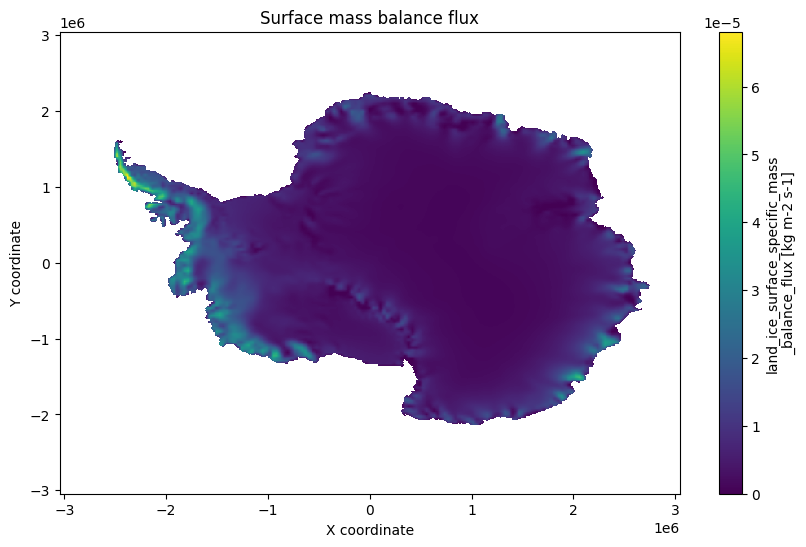

In [12]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
nc_data[variable_name].isel(time=0).plot(ax=ax)

# Add titles and labels as necessary
ax.set_title('Surface mass balance flux')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')


# Show the plot
plt.show()
